# Exploratory Data Analysis

### By Natalia López Gallego

-----------------------------------------------------------------------------



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
data = [
    "../data/external/2015.csv",
    "../data/external/2016.csv",
    "../data/external/2017.csv",
    "../data/external/2018.csv",
    "../data/external/2019.csv"
]

dfs = {}  # Dictionary to save DataFrames by year

for file in data:
    # Extract year from filename correctly
    year = file.split("/")[-1][:4]  # "2015.csv" → "2015"
    df = pd.read_csv(file)
    dfs[year] = df  # Save the DataFrame with key = year

In [3]:
for year, df in dfs.items():
    print(f"\n{year} DataFrame:\n")
    df.info()


2015 DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(

In [4]:
# Diccionario de nombres estándar por año
column_renames = {
    "2015": {
        "Country": "Country",
        "Region": "Region",
        "Happiness Rank": "Happiness Rank",
        "Happiness Score": "Happiness Score",
        "Standard Error": "Standard Error",
        "Economy (GDP per Capita)": "Economy",
        "Family": "Family",
        "Health (Life Expectancy)": "Health",
        "Freedom": "Freedom",
        "Trust (Government Corruption)": "Trust",
        "Generosity": "Generosity",
        "Dystopia Residual": "Dystopia Residual"
    },
    "2016": {
        "Country": "Country",
        "Region": "Region",
        "Happiness Rank": "Happiness Rank",
        "Happiness Score": "Happiness Score",
        "Lower Confidence Interval": "CI Lower",
        "Upper Confidence Interval": "CI Upper",
        "Economy (GDP per Capita)": "Economy",
        "Family": "Family",
        "Health (Life Expectancy)": "Health",
        "Freedom": "Freedom",
        "Trust (Government Corruption)": "Trust",
        "Generosity": "Generosity",
        "Dystopia Residual": "Dystopia Residual"
    },
    "2017": {
        "Country": "Country",
        "Happiness.Rank": "Happiness Rank",
        "Happiness.Score": "Happiness Score",
        "Whisker.high": "CI Upper",
        "Whisker.low": "CI Lower",
        "Economy..GDP.per.Capita.": "Economy",
        "Family": "Family",
        "Health..Life.Expectancy.": "Health",
        "Freedom": "Freedom",
        "Trust..Government.Corruption.": "Trust",
        "Generosity": "Generosity",
        "Dystopia.Residual": "Dystopia Residual"
    },
    "2018": {
        "Overall rank": "Happiness Rank",
        "Country or region": "Country",
        "Score": "Happiness Score",
        "GDP per capita": "Economy",
        "Social support": "Family",
        "Healthy life expectancy": "Health",
        "Freedom to make life choices": "Freedom",
        "Generosity": "Generosity",
        "Perceptions of corruption": "Trust"
    },
    "2019": {
        "Overall rank": "Happiness Rank",
        "Country or region": "Country",
        "Score": "Happiness Score",
        "GDP per capita": "Economy",
        "Social support": "Family",
        "Healthy life expectancy": "Health",
        "Freedom to make life choices": "Freedom",
        "Generosity": "Generosity",
        "Perceptions of corruption": "Trust"
    }
}

# Aplicar renombramiento a cada DataFrame en dfs
for year, df in dfs.items():
    if year in column_renames:
        dfs[year] = df.rename(columns=column_renames[year])


In [6]:
# Función para convertir a snake_case
def to_snake_case(column_name):
    column_name = column_name.lower()  # Convertir a minúsculas
    column_name = re.sub(r'\s+', '_', column_name)  # Reemplazar espacios por guiones bajos
    column_name = re.sub(r'[^\w\s]', '', column_name)  # Eliminar caracteres no alfanuméricos
    return column_name

# Aplicar renombramiento a cada DataFrame
for year, df in dfs.items():
    # Renombrar todas las columnas del DataFrame a snake_case
    df.columns = [to_snake_case(col) for col in df.columns]

In [7]:
# Obtener las columnas comunes entre todos los DataFrames
common_columns = set(dfs["2015"].columns)  # Iniciar con las columnas del primer DataFrame

# Iterar por los DataFrames y actualizar las columnas comunes
for year, df in dfs.items():
    common_columns &= set(df.columns)  # Intersección de columnas

# Convertir las columnas comunes a lista
common_columns = list(common_columns)

# Filtrar los DataFrames para que solo contengan las columnas comunes
for year, df in dfs.items():
    dfs[year] = df[common_columns]  # Filtra solo las columnas comunes

# Verificar el resultado
for year, df in dfs.items():
    print(f"DataFrame para {year} con columnas comunes:\n", df.columns)

DataFrame para 2015 con columnas comunes:
 Index(['freedom', 'generosity', 'happiness_rank', 'economy', 'country',
       'family', 'happiness_score', 'health', 'trust'],
      dtype='object')
DataFrame para 2016 con columnas comunes:
 Index(['freedom', 'generosity', 'happiness_rank', 'economy', 'country',
       'family', 'happiness_score', 'health', 'trust'],
      dtype='object')
DataFrame para 2017 con columnas comunes:
 Index(['freedom', 'generosity', 'happiness_rank', 'economy', 'country',
       'family', 'happiness_score', 'health', 'trust'],
      dtype='object')
DataFrame para 2018 con columnas comunes:
 Index(['freedom', 'generosity', 'happiness_rank', 'economy', 'country',
       'family', 'happiness_score', 'health', 'trust'],
      dtype='object')
DataFrame para 2019 con columnas comunes:
 Index(['freedom', 'generosity', 'happiness_rank', 'economy', 'country',
       'family', 'happiness_score', 'health', 'trust'],
      dtype='object')


In [8]:
for year, df in dfs.items():
    print(f"DataFrame para {year} - Cantidad de Filas y columnas:\n", df.shape)

DataFrame para 2015 - Cantidad de Filas y columnas:
 (158, 9)
DataFrame para 2016 - Cantidad de Filas y columnas:
 (157, 9)
DataFrame para 2017 - Cantidad de Filas y columnas:
 (155, 9)
DataFrame para 2018 - Cantidad de Filas y columnas:
 (156, 9)
DataFrame para 2019 - Cantidad de Filas y columnas:
 (156, 9)


In [9]:
for year, df in dfs.items():
    print(f"Describe para {year}:\n", df.describe(), "\n")

Describe para 2015:
           freedom  generosity  happiness_rank     economy      family  \
count  158.000000  158.000000      158.000000  158.000000  158.000000   
mean     0.428615    0.237296       79.493671    0.846137    0.991046   
std      0.150693    0.126685       45.754363    0.403121    0.272369   
min      0.000000    0.000000        1.000000    0.000000    0.000000   
25%      0.328330    0.150553       40.250000    0.545808    0.856823   
50%      0.435515    0.216130       79.500000    0.910245    1.029510   
75%      0.549092    0.309883      118.750000    1.158448    1.214405   
max      0.669730    0.795880      158.000000    1.690420    1.402230   

       happiness_score      health       trust  
count       158.000000  158.000000  158.000000  
mean          5.375734    0.630259    0.143422  
std           1.145010    0.247078    0.120034  
min           2.839000    0.000000    0.000000  
25%           4.526000    0.439185    0.061675  
50%           5.232500    0

In [10]:
# Función para detectar outliers usando IQR
def detect_outliers(df):
    outliers = {}
    for column in df.select_dtypes(include=[np.number]).columns:
        # Calcular los cuartiles
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Definir los límites para outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Detectar outliers
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index.tolist()

    return outliers

# Iterar sobre los DataFrames para detectar outliers
for year, df in dfs.items():
    outliers = detect_outliers(df)
    print(f"Outliers detectados para {year}:\n", outliers, "\n")


Outliers detectados para 2015:
 {'freedom': [], 'generosity': [33, 128], 'happiness_rank': [], 'economy': [], 'family': [147, 152, 157], 'happiness_score': [], 'health': [], 'trust': [0, 2, 3, 5, 7, 8, 16, 19, 23, 27, 71, 90, 129, 153]} 

Outliers detectados para 2016:
 {'freedom': [], 'generosity': [29, 32, 78, 118], 'happiness_rank': [], 'economy': [], 'family': [154], 'happiness_score': [], 'health': [], 'trust': [0, 1, 3, 4, 7, 9, 19, 21, 27, 35, 96, 151]} 

Outliers detectados para 2017:
 {'freedom': [], 'generosity': [80, 113], 'happiness_rank': [], 'economy': [], 'family': [142, 149, 151, 154], 'happiness_score': [], 'health': [], 'trust': [0, 1, 3, 4, 7, 8, 9, 14, 17, 20, 25, 34, 150]} 

Outliers detectados para 2018:
 {'freedom': [136, 141], 'generosity': [95, 129], 'happiness_rank': [], 'economy': [19], 'family': [135, 149, 154], 'happiness_score': [], 'health': [], 'trust': [0, 1, 2, 4, 5, 6, 7, 8, 9, 13, 14, 16, 18, 33, 75, 97, 150]} 

Outliers detectados para 2019:
 {'free

In [11]:
# Iterar sobre los DataFrames y detectar valores nulos
for year, df in dfs.items():
    print(f"Valores nulos para {year}:\n")

    # Mostrar los valores nulos por columna
    null_counts = df.isnull().sum()

    # Imprimir solo las columnas con valores nulos
    print(null_counts[null_counts > 0], "\n")

Valores nulos para 2015:

Series([], dtype: int64) 

Valores nulos para 2016:

Series([], dtype: int64) 

Valores nulos para 2017:

Series([], dtype: int64) 

Valores nulos para 2018:

trust    1
dtype: int64 

Valores nulos para 2019:

Series([], dtype: int64) 



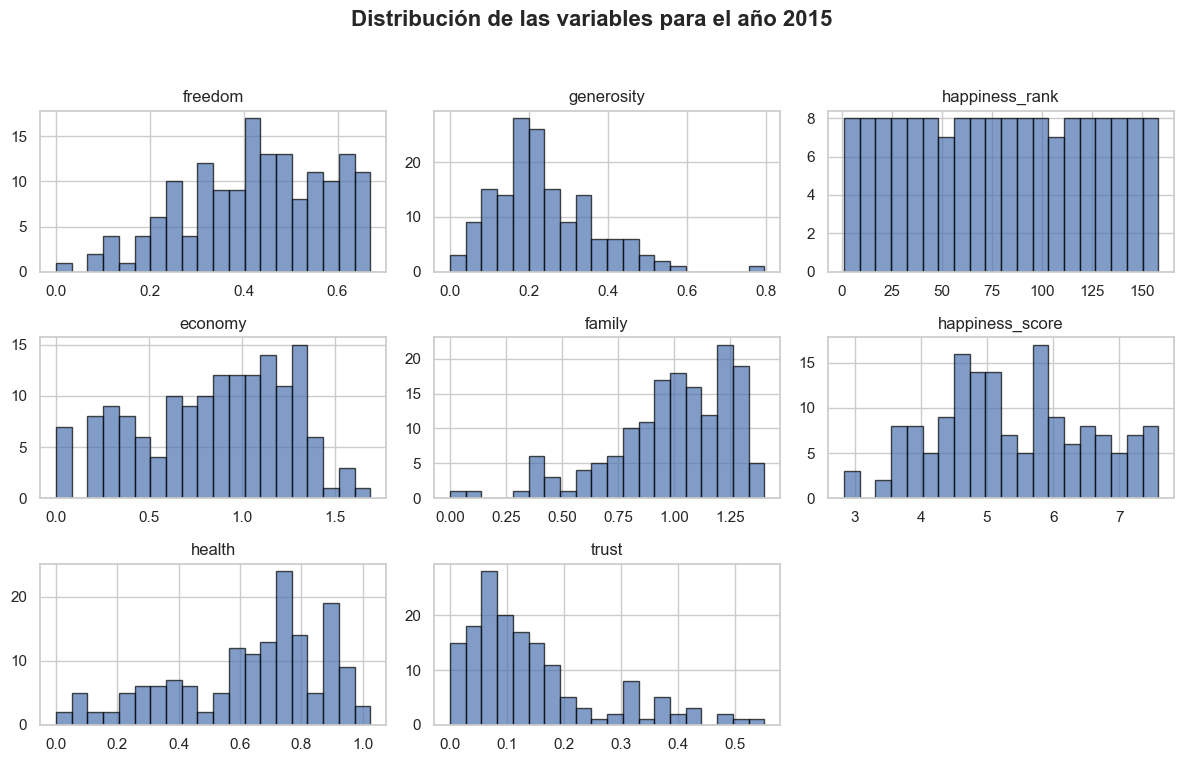

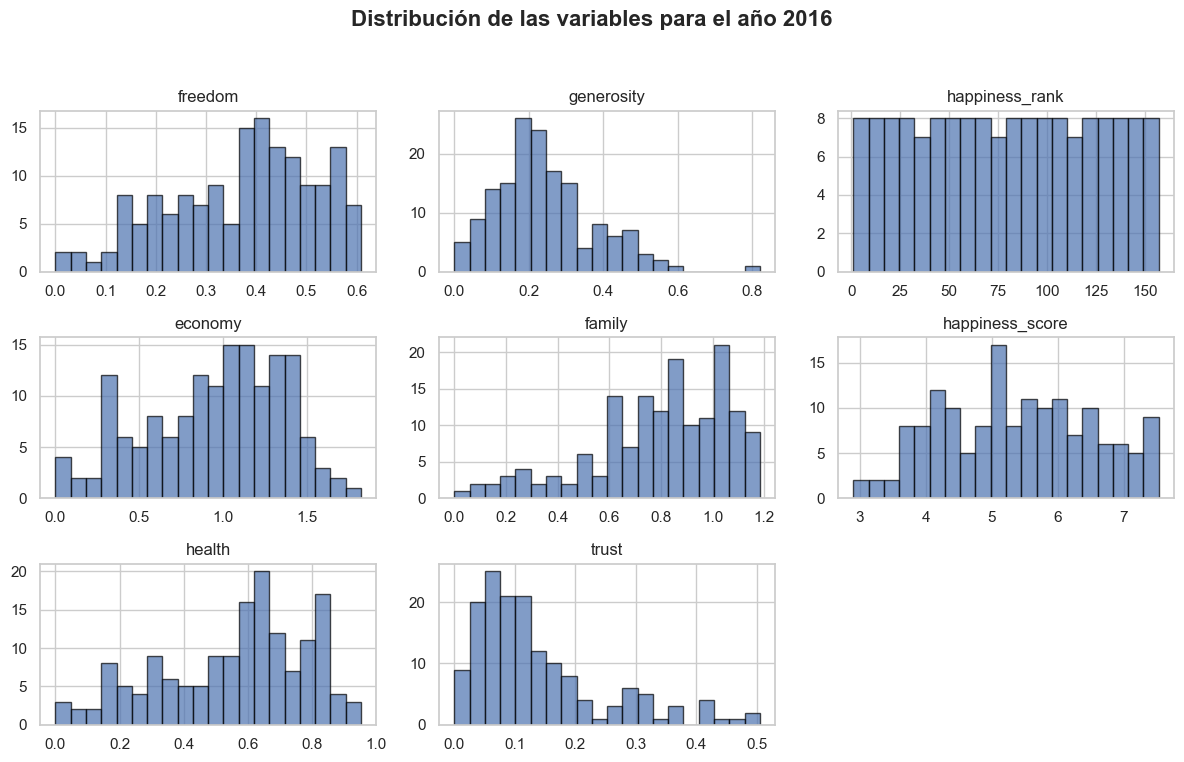

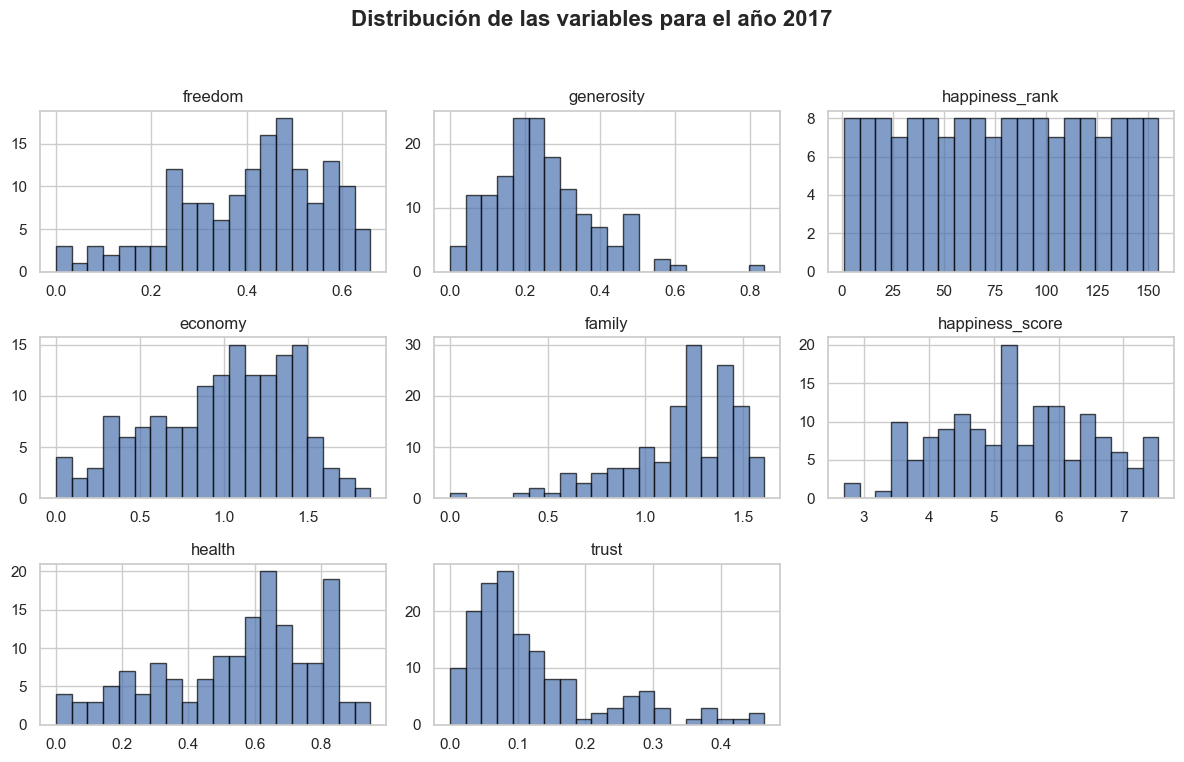

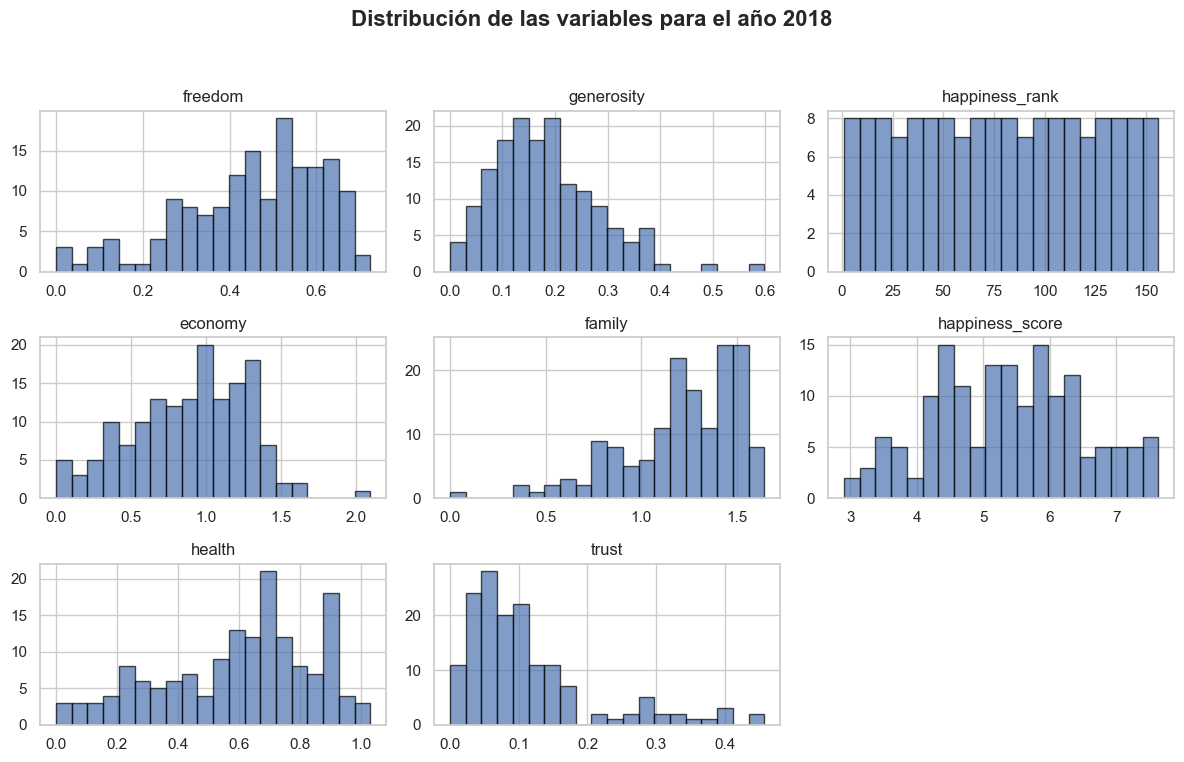

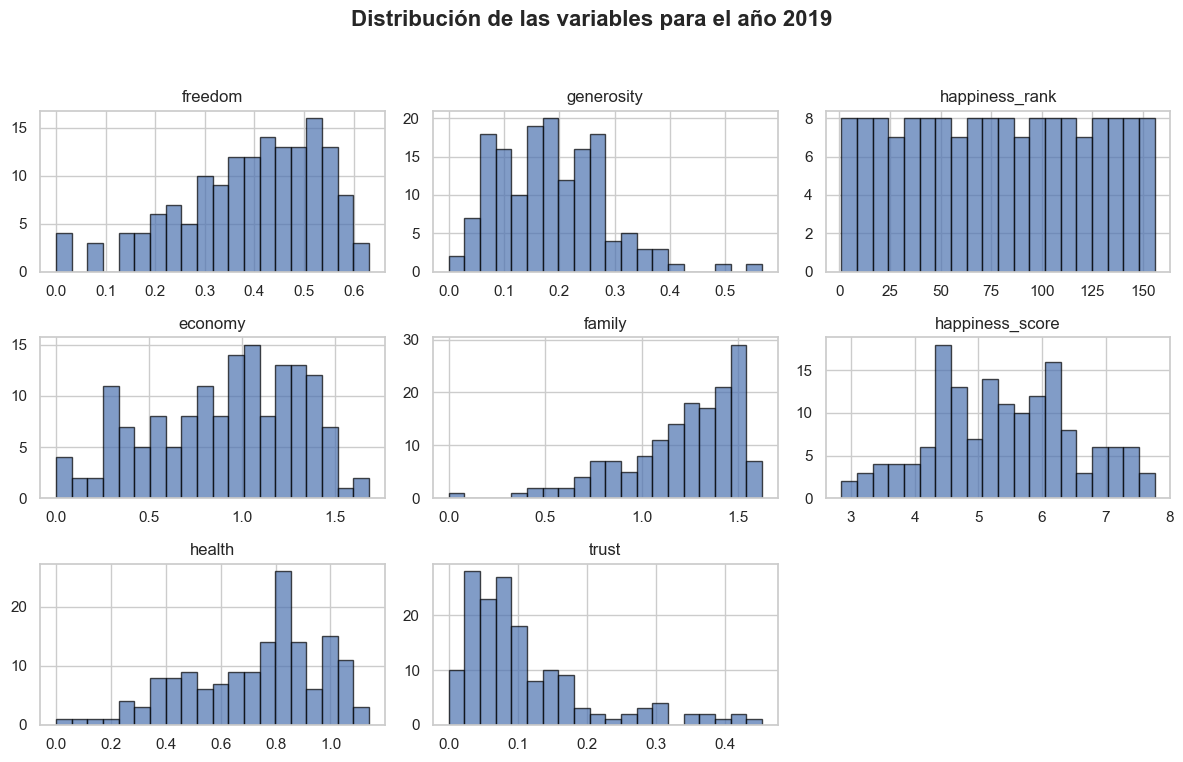

In [12]:
# Configuración estética de los gráficos
sns.set(style="whitegrid")  # Estilo de fondo blanco con líneas de cuadrícula
plt.rcParams["figure.figsize"] = (12, 8)  # Tamaño por defecto de las figuras

# Iterar sobre los DataFrames
for year, df in dfs.items():
    # Generar el histograma de todas las columnas numéricas
    df_numeric = df.select_dtypes(include=['number'])

    # Crear un histograma para cada columna numérica
    df_numeric.hist(bins=20, edgecolor='black', alpha=0.7)

    # Título y etiquetas
    plt.suptitle(f"Distribución de las variables para el año {year}", fontsize=16, fontweight='bold')
    plt.xlabel('Valor', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)

    # Ajustar el layout para que todo encaje bien
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Mostrar el gráfico
    plt.show()


Como la distribución de `trust` para 2028 está sesgada a la derecha (right-skewed), la mediana es una opción más robusta que la media para imputar valores nulos. En este caso hay un solo valor nulo, y se manejará imputando la mediana.


In [16]:
#Calcular la mediana de 'trust' para 2018
median_trust_2018 = dfs[2018]['trust'].median()

# Imputar valores nulos con la mediana
dfs[2018]['trust'].fillna(median_trust_2018, inplace=True)

# Verificar que ya no hay valores nulos
print(dfs[2018]['trust'].isnull().sum())

KeyError: 2018

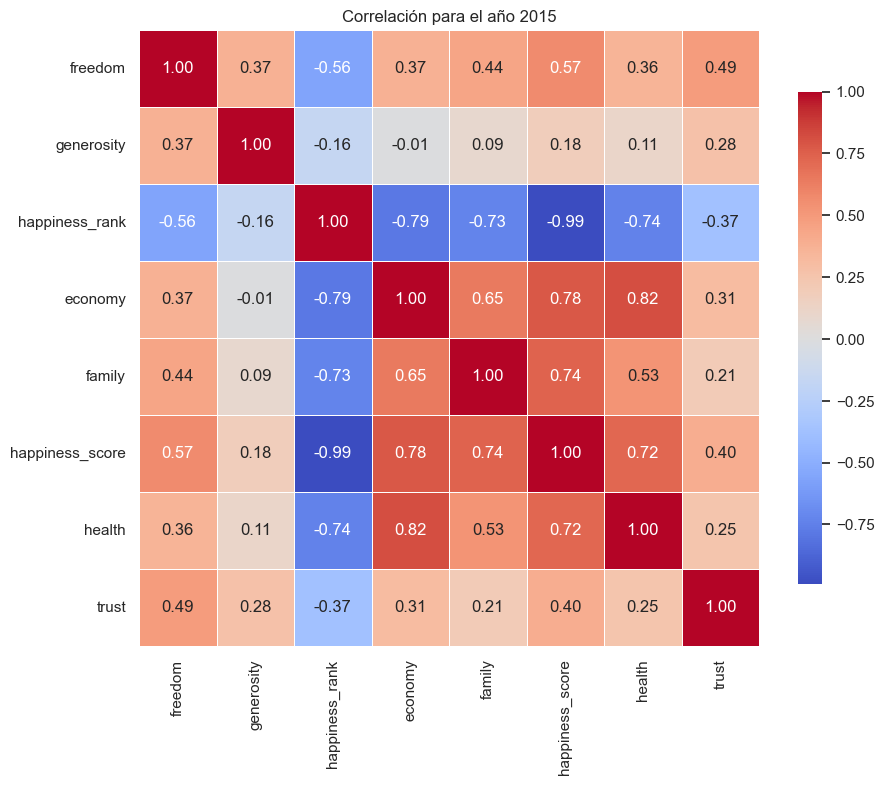

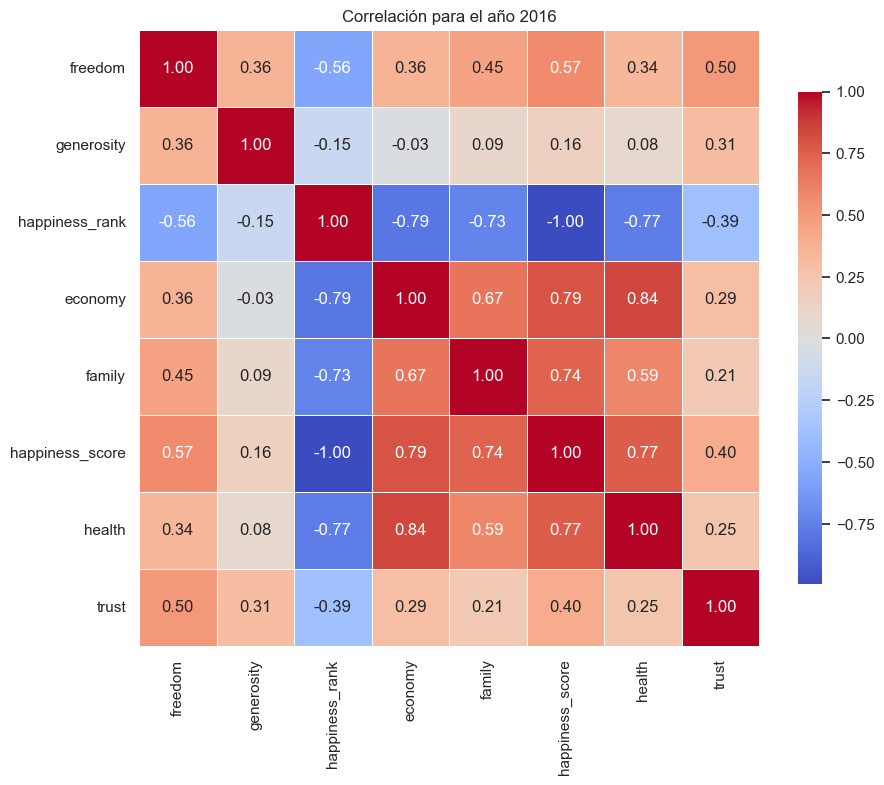

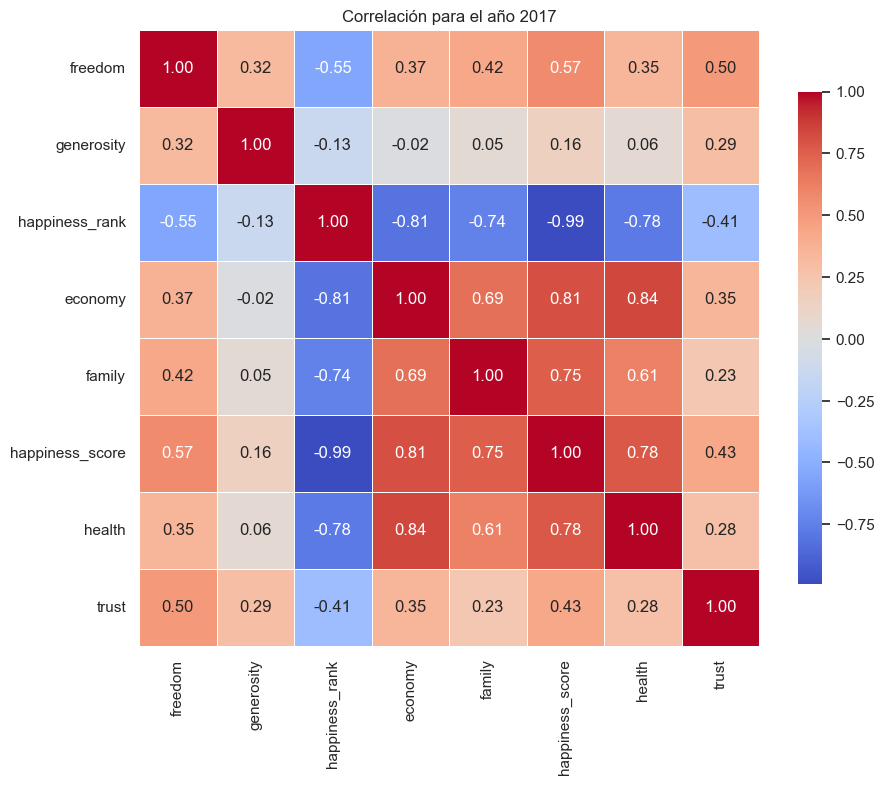

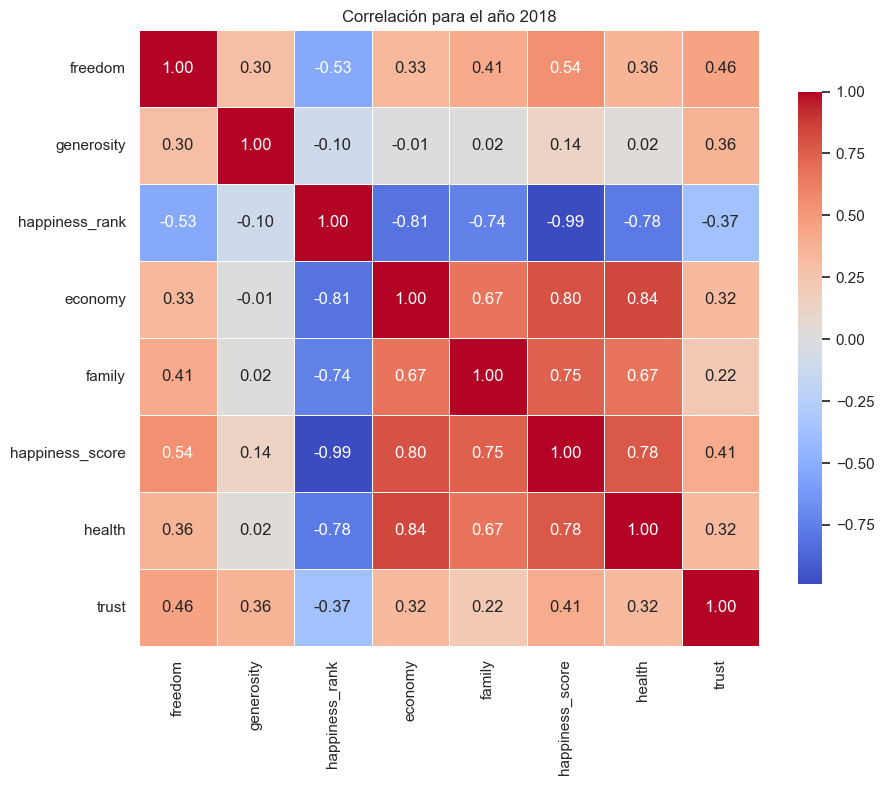

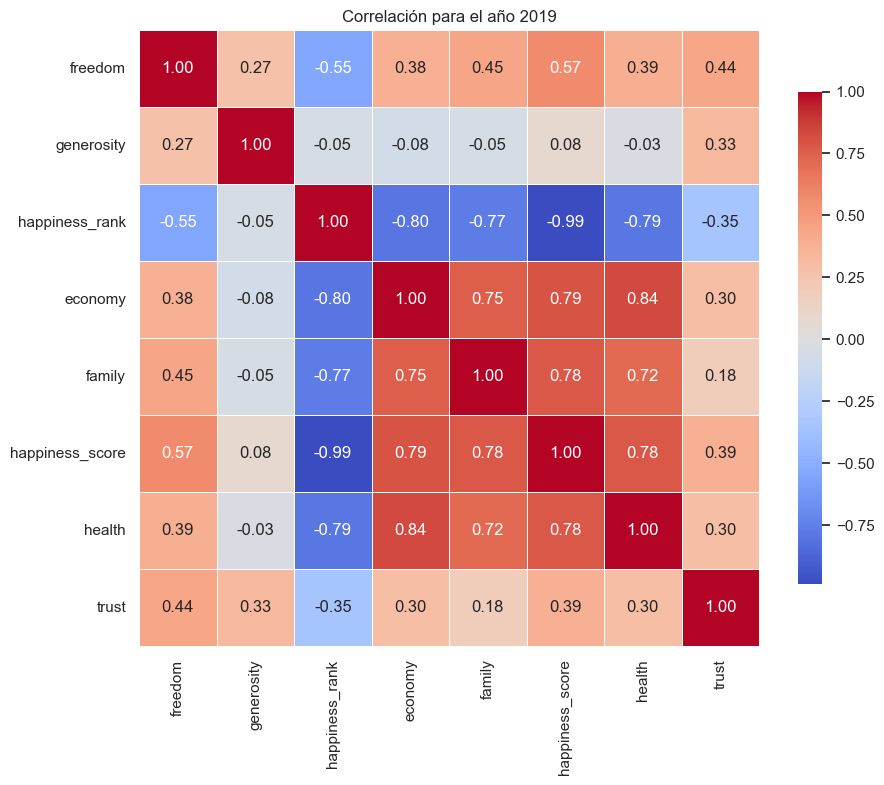

In [13]:
# Iterar sobre los DataFrames
for year, df in dfs.items():
    # Seleccionar solo las columnas numéricas (sin necesidad de eliminar la columna 'Country')
    df_numeric = df.select_dtypes(include=['number'])

    # Calcular la matriz de correlación para las columnas numéricas
    corr = df_numeric.corr()

    # Crear un mapa de calor para la matriz de correlación
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})

    # Título del gráfico
    plt.title(f"Correlación para el año {year}")
    plt.show()

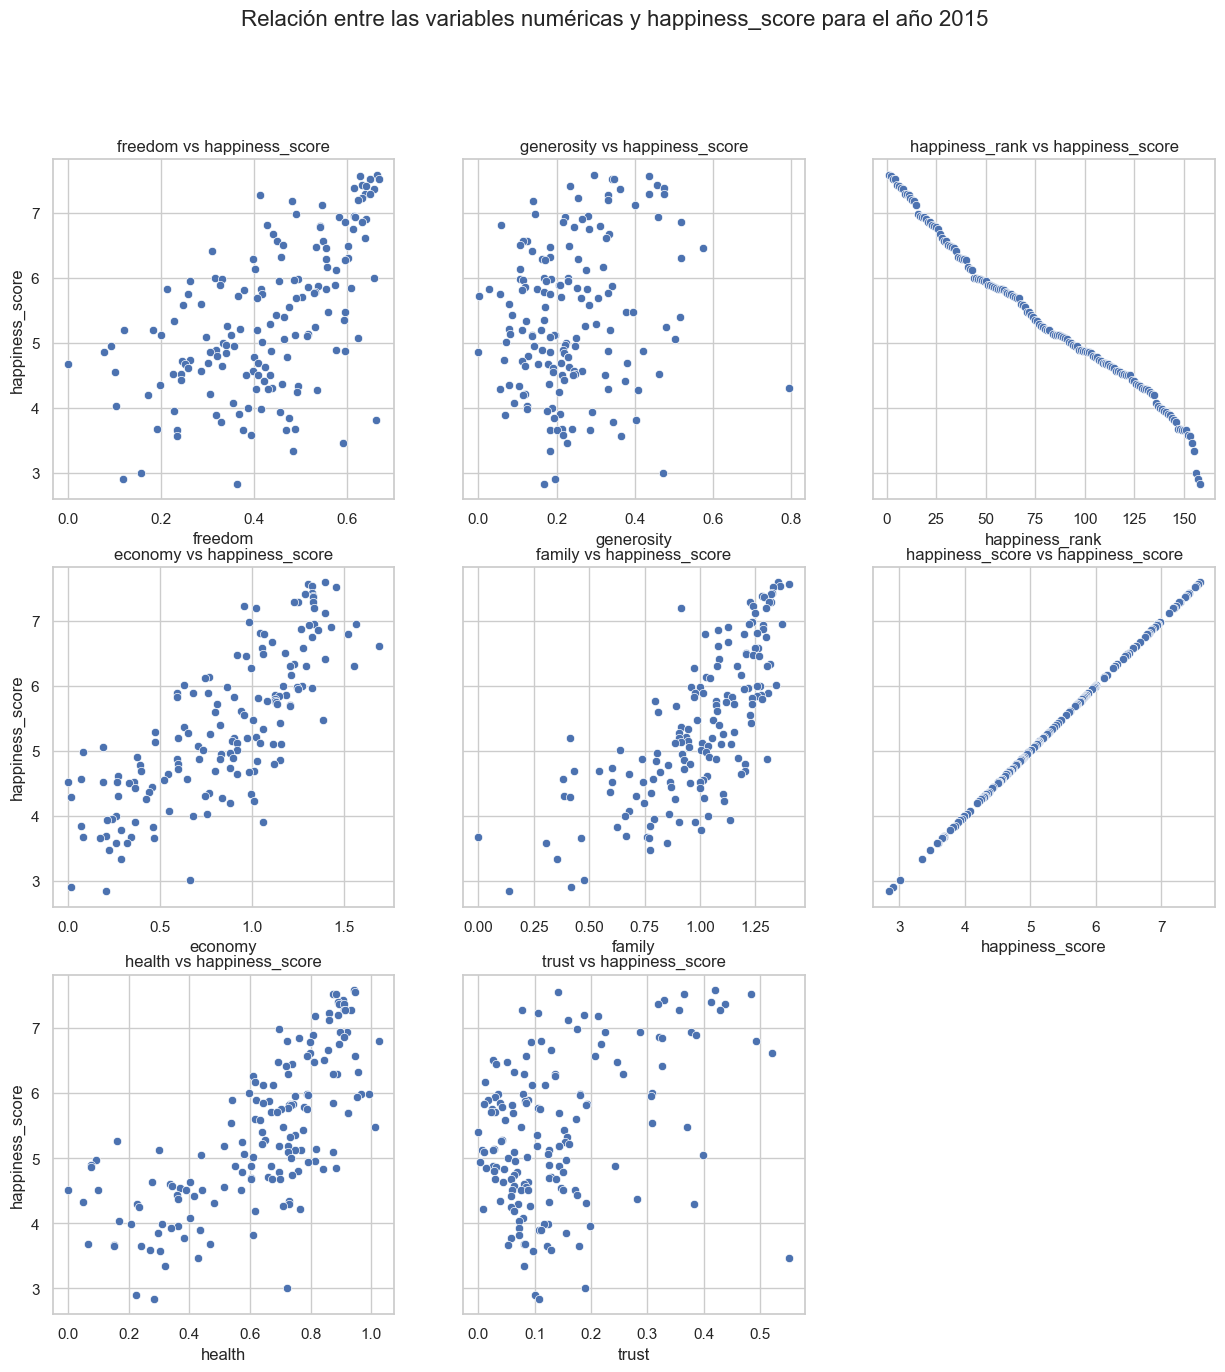

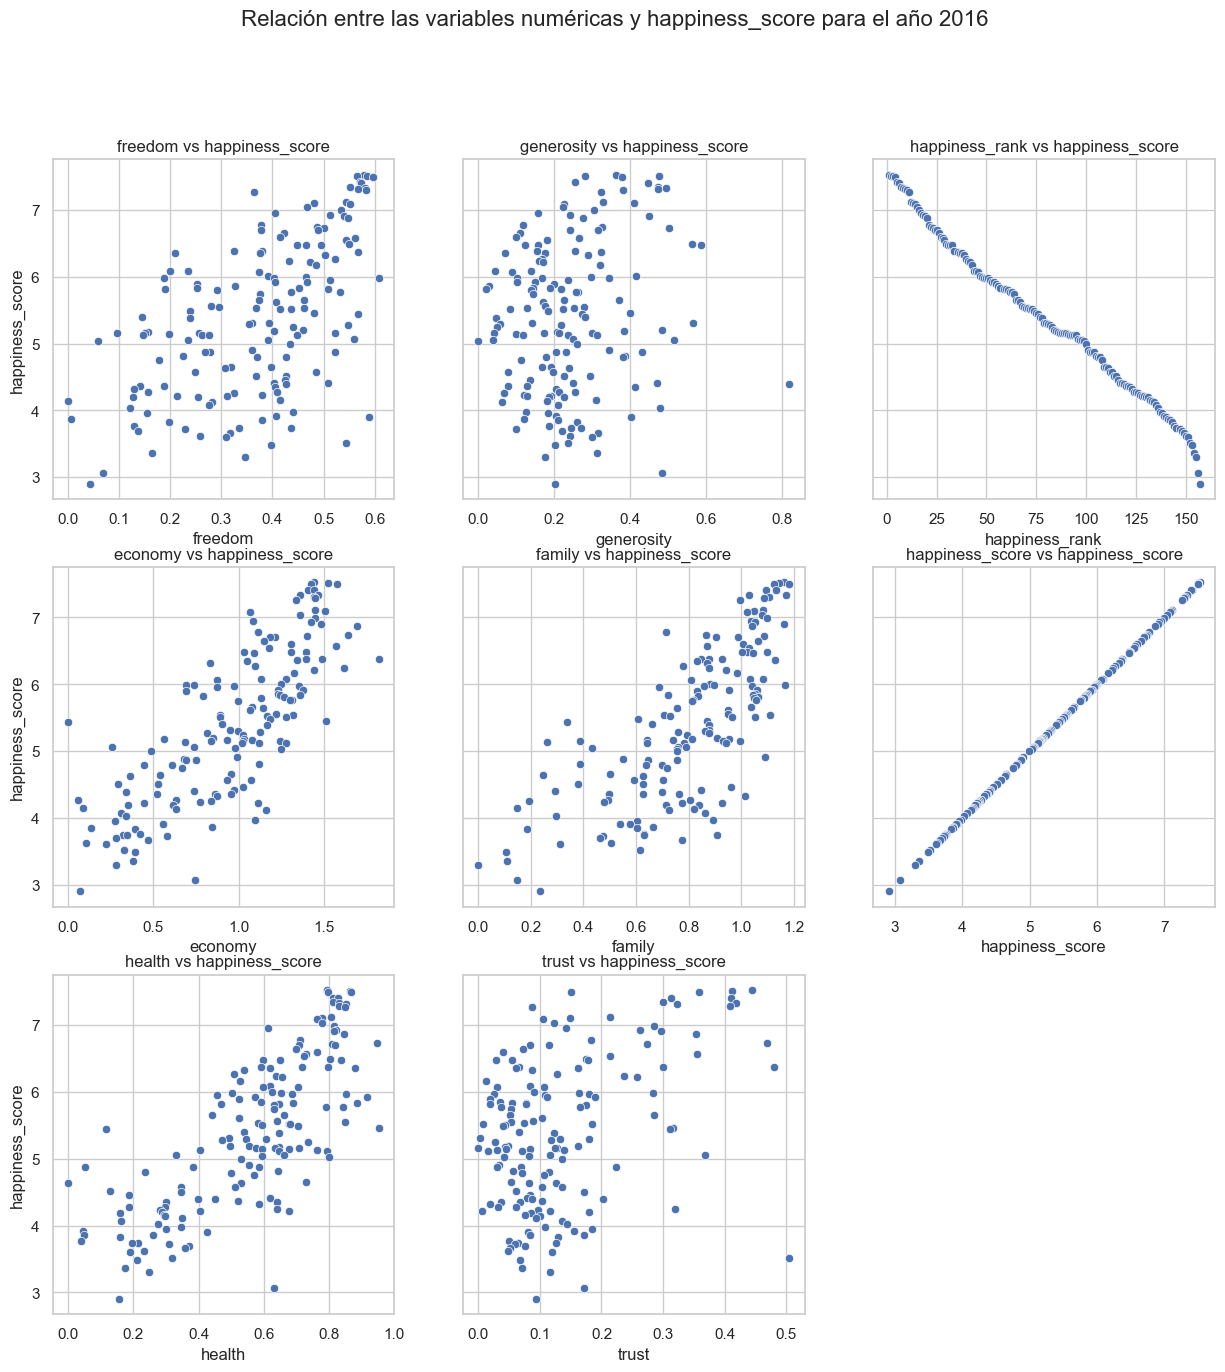

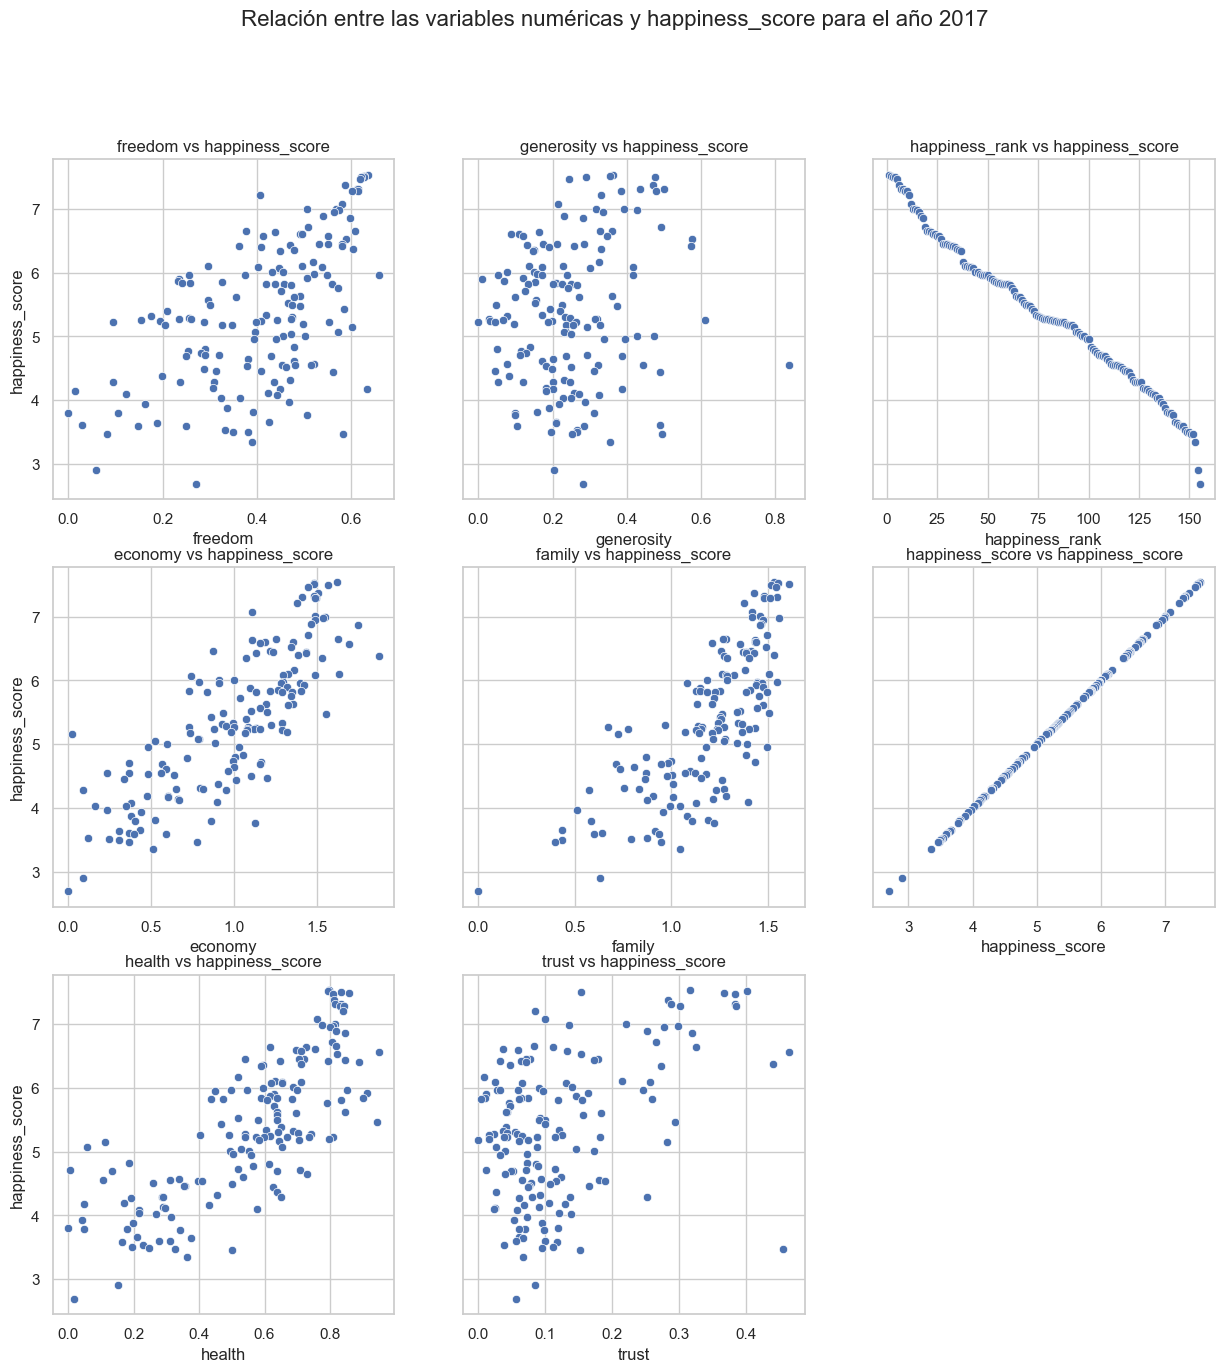

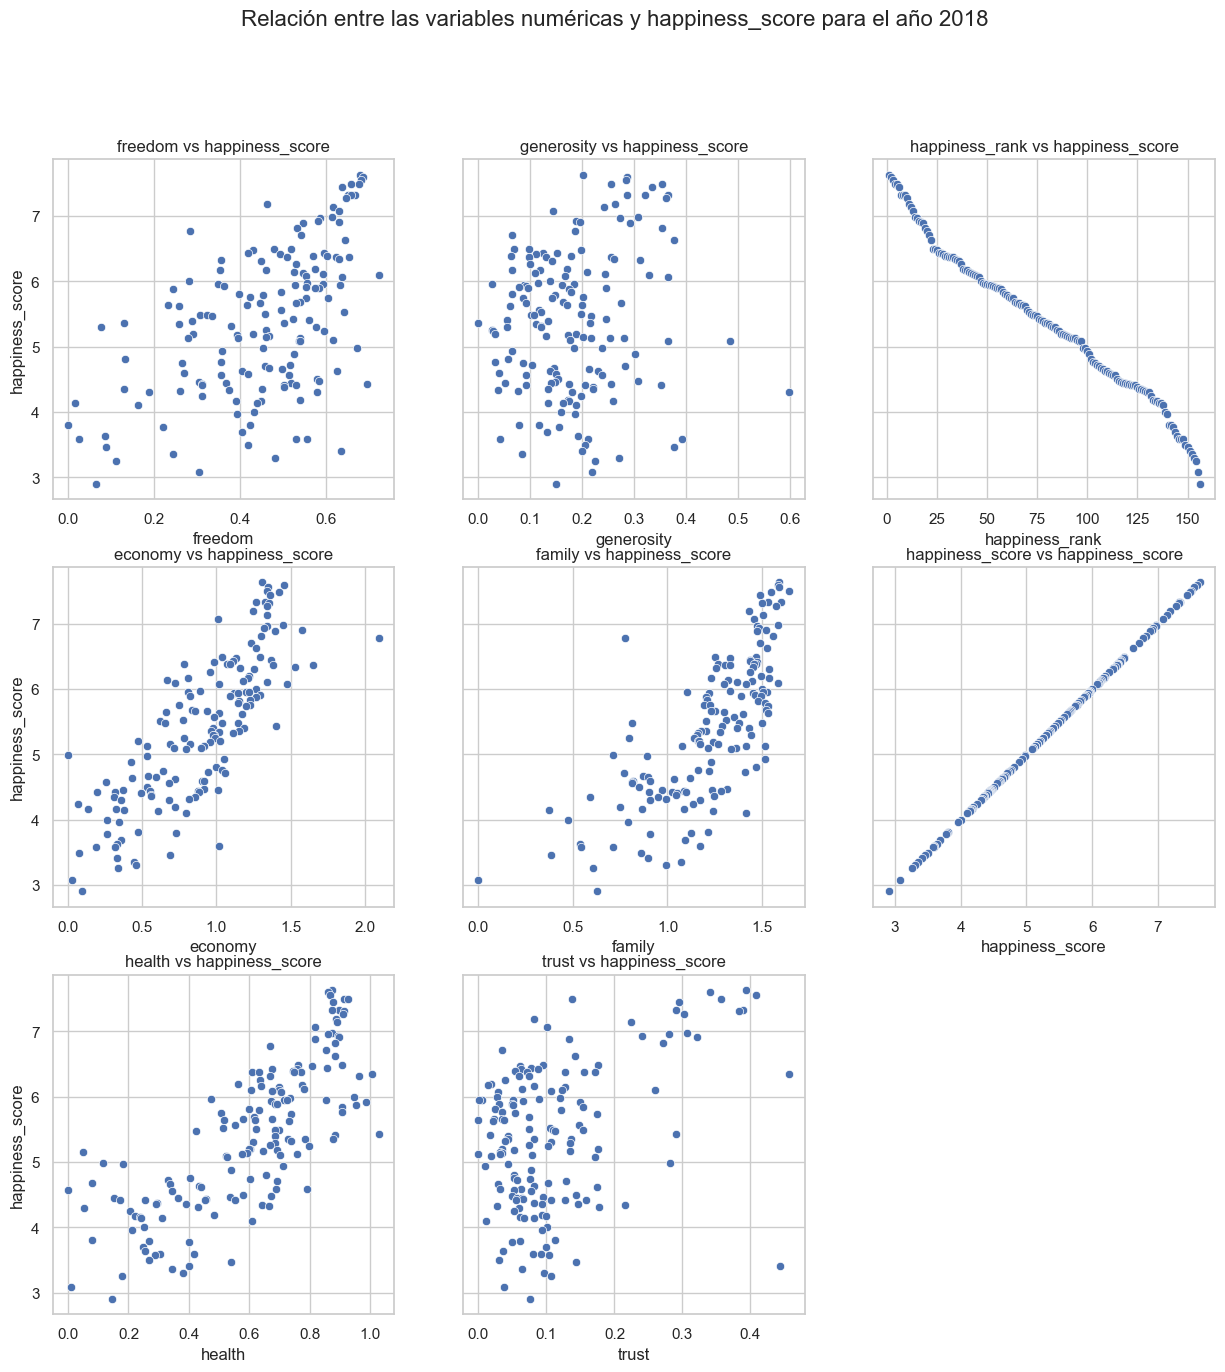

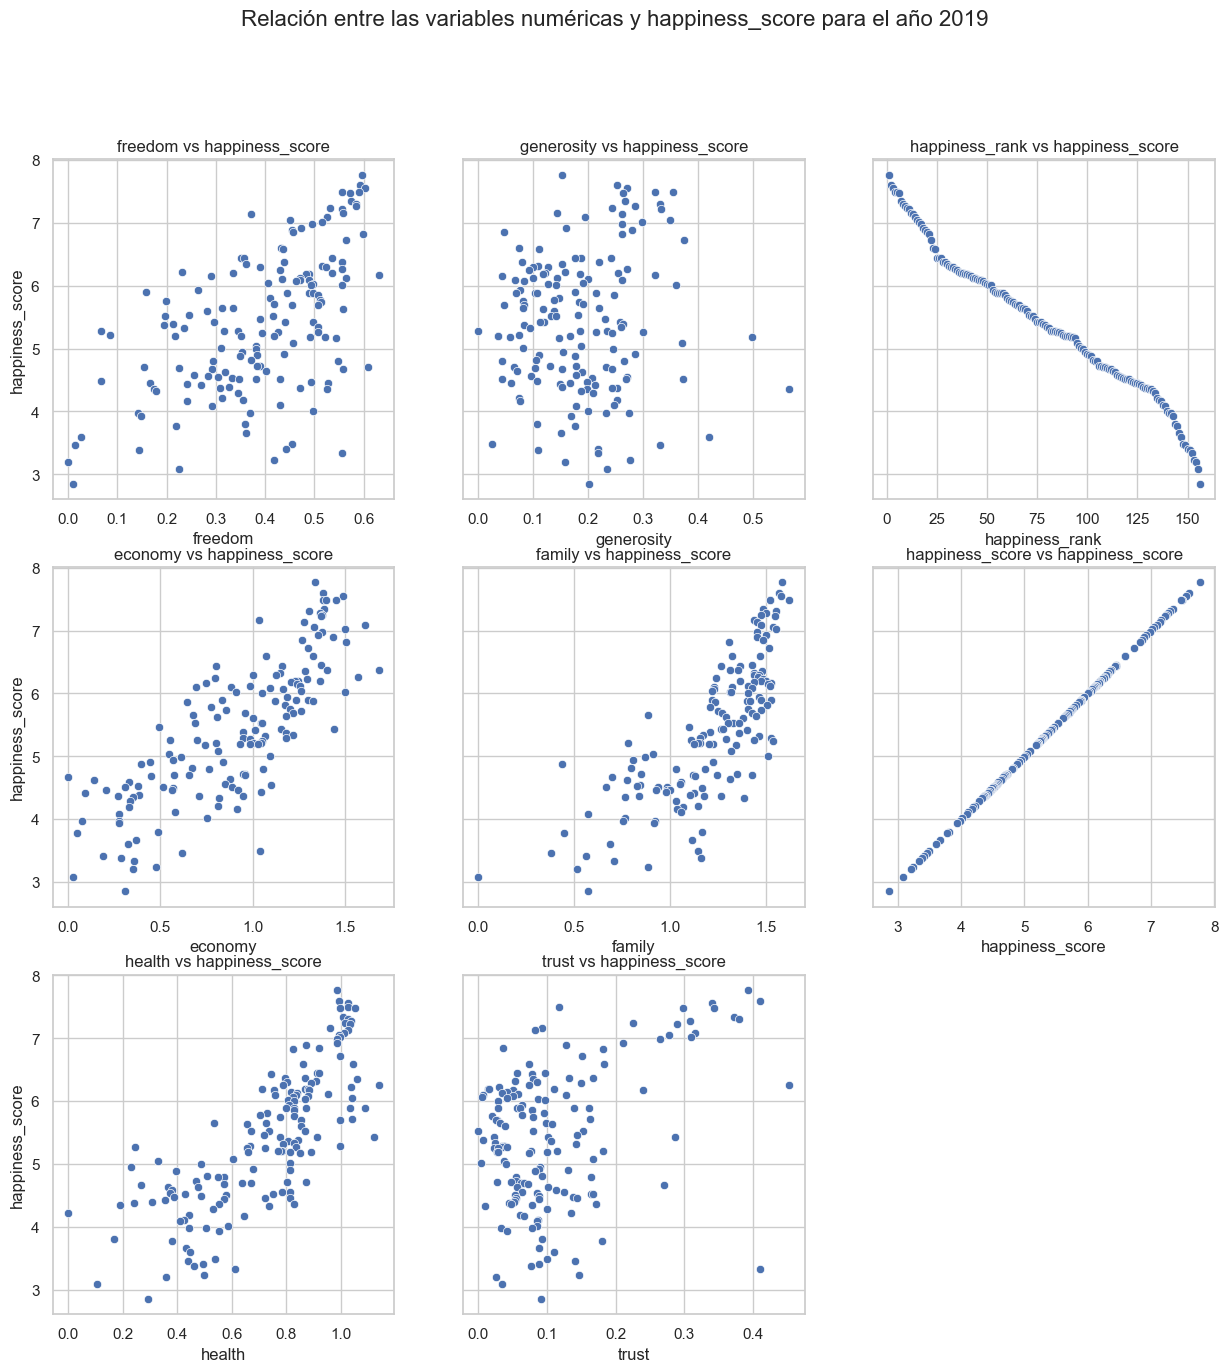

In [15]:
target_column = 'happiness_score'  # Reemplaza con tu columna objetivo

# Iterar sobre los DataFrames
for year, df in dfs.items():
    df_numeric = df.select_dtypes(include=['number'])
    num_columns = len(df_numeric.columns)

    # Definir el número de filas y columnas dinámicamente
    num_rows = int(np.ceil(num_columns / 3))  # Ajusta el divisor según el número máximo de columnas por fila
    num_cols = min(3, num_columns)  # Máximo 3 columnas por fila para mejor organización

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows), sharey=True)
    axes = axes.flatten()  # Asegurar que sea una lista plana para iterar fácilmente

    # Iterar sobre las columnas numéricas y graficarlas en subgráficas
    for ax, column in zip(axes, df_numeric.columns):
        sns.scatterplot(x=df[column], y=df[target_column], ax=ax)
        ax.set_title(f"{column} vs {target_column}")
        ax.set_xlabel(column)

    # Ocultar ejes no utilizados
    for i in range(num_columns, len(axes)):
        fig.delaxes(axes[i])

    fig.suptitle(f"Relación entre las variables numéricas y {target_column} para el año {year}", fontsize=16)
    
    plt.show()